In [45]:
from astroquery.gaia import Gaia
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.table import Table

%matplotlib inline

In [46]:
query = """
SELECT TOP 1000
    source_id,
    parallax,
    parallax_over_error,
    phot_g_mean_mag,
    phot_bp_mean_mag,
    phot_rp_mean_mag,
    ruwe
FROM gaiadr3.gaia_source
WHERE parallax > 10                     -- distance < 100 pc
AND parallax_over_error > 10            -- reliable distances
AND ruwe < 1.4
AND phot_g_mean_mag IS NOT NULL
AND phot_bp_mean_mag IS NOT NULL
AND phot_rp_mean_mag IS NOT NULL
"""

job = Gaia.launch_job_async(query)
data = job.get_results()

print(f"Number of stars retrieved: {len(data)}")

INFO: Query finished. [astroquery.utils.tap.core]
Number of stars retrieved: 1000


In [47]:
parallax = data["parallax"]
g_mean = data["phot_g_mean_mag"]
bp_mean = data["phot_bp_mean_mag"]
rp_mean = data["phot_rp_mean_mag"]

# color index
color_index = bp_mean - rp_mean
# Absolute magnitude (Gaia-specific form)
absolute_magnitude = g_mean + 5 * np.log10(parallax) - 10

In [48]:
# Safety mask (remove NaNs or infinities)
mask = np.isfinite(color_index) & np.isfinite(absolute_magnitude)

color_index = color_index[mask]
absolute_magnitude = absolute_magnitude[mask]

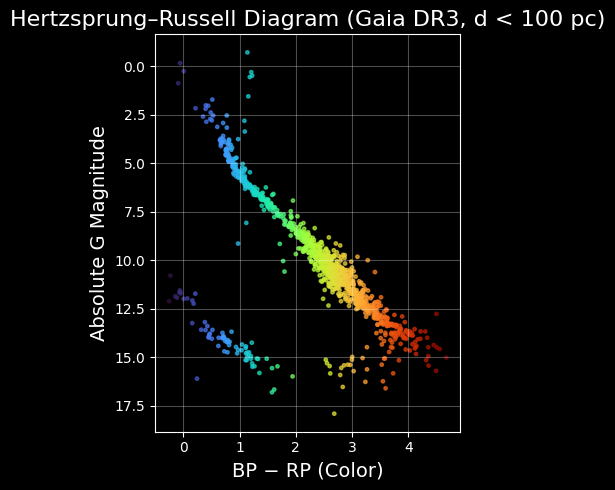

In [51]:
plt.figure(figsize=(4, 5), facecolor='black')

plt.scatter(
    color_index,
    absolute_magnitude,
    c=color_index,
    s=6,
    alpha=0.7,
    cmap="turbo",
    rasterized=True
)

ax = plt.gca()
ax.set_facecolor('black')

# Make all text visible on dark background
ax.tick_params(colors='white', which='both')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')

# Make spines visible
for spine in ax.spines.values():
    spine.set_color('white')

# Improve grid visibility
ax.grid(color='white', alpha=0.25)

# Astronomical convention: brighter stars on top
ax.invert_yaxis()

plt.xlabel("BP − RP (Color)", fontsize=14)
plt.ylabel("Absolute G Magnitude", fontsize=14)
plt.title("Hertzsprung–Russell Diagram (Gaia DR3, d < 100 pc)", fontsize=16)

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()